In [ ]:
import numpy as np
import pandas as pd

In [ ]:
url="/content/sample_data/iris (1).csv"

In [ ]:
data=pd.read_csv(url)

In [ ]:
df=pd.DataFrame(data)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
url = "/content/sample_data/iris (1).csv"  # Replace with the actual path if needed
df = pd.read_csv(url)

In [ ]:
X = df.drop('species', axis=1)  # Features
y = df['species']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

# Experiment with different k values
k_values = list(range(1, 31))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(scores.mean())

# Find the optimal k with the highest cross-validation accuracy
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"Optimal k value: {optimal_k}")

Optimal k value: 3


In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



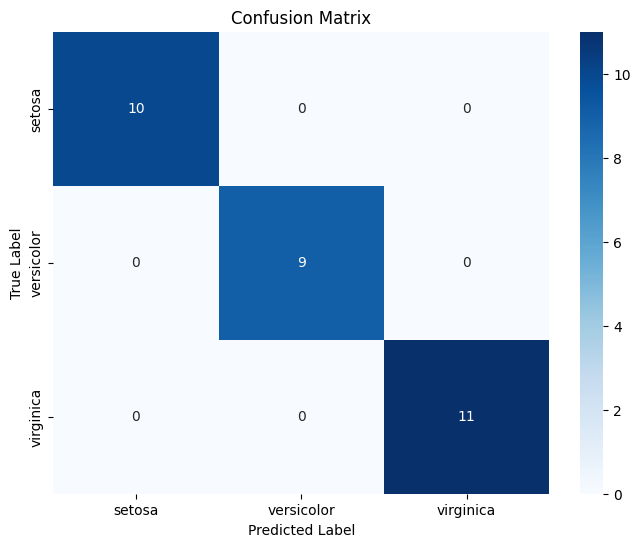

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# ... (previous code for loading data, finding optimal k, and training the model) ...

# Make predictions
y_pred = knn.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=df['species'].unique(), columns=df['species'].unique())

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Optimal k value: 3
Highest Accuracy: 0.9583
Lowest Error Rate: 0.0417


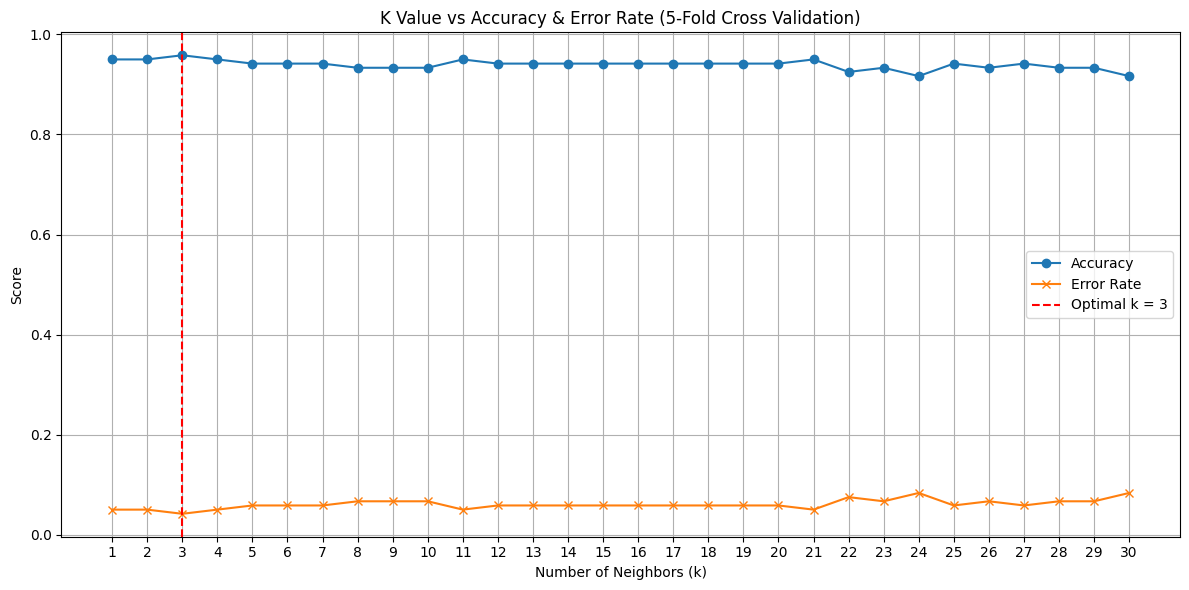

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Range of k values to try
k_values = list(range(1, 31))
cv_accuracies = []  # Accuracy = correct predictions / total predictions
cv_errors = []      # Error rate = 1 - accuracy

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy = scores.mean()
    cv_accuracies.append(mean_accuracy)
    cv_errors.append(1 - mean_accuracy)  # Error rate is just 1 - accuracy

# Find the optimal k
optimal_k = k_values[cv_accuracies.index(max(cv_accuracies))]
print(f"Optimal k value: {optimal_k}")
print(f"Highest Accuracy: {max(cv_accuracies):.4f}")
print(f"Lowest Error Rate: {min(cv_errors):.4f}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(k_values, cv_accuracies, label='Accuracy', marker='o')
plt.plot(k_values, cv_errors, label='Error Rate', marker='x')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('K Value vs Accuracy & Error Rate (5-Fold Cross Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
